Before you are ready to classify news articles, you need to be introduced to the basics of clustering. This chapter familiarizes you with a class of machine learning algorithms called unsupervised learning and then introduces you to clustering, one of the popular unsupervised learning algorithms. You will know about two popular clustering techniques - hierarchical clustering and k-means clustering. The chapter concludes with basic pre-processing steps before you start clustering data.

In [1]:
import pandas as pd
import numpy as np
fifa = pd.read_csv('../datasets/fifa.csv')
fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


# Unsupervised Learning: Basics

### Pokémon sightings

There have been reports of sightings of rare, legendary Pokémon. You have been asked to investigate! Plot the coordinates of sightings to find out where the Pokémon might be. The X and Y coordinates of the points are stored in list x and y, respectively.

In [2]:
# Define variables needed for exercise.
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

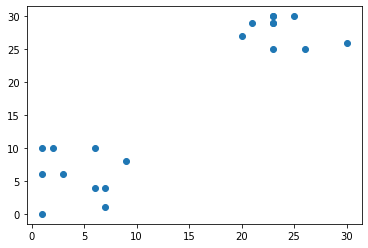

In [3]:
# Import plotting class from matplotlib library
from matplotlib import pyplot as plt

# Create a scatter plot
plt.scatter(x, y)

# Display the scatter plot
plt.show()

# Basics of cluster analysis

### Pokémon sightings: hierarchical clustering

We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Remember that in the scatter plot of the previous exercise, you identified two areas where Pokémon sightings were dense. This means that the points seem to separate into two clusters. In this exercise, you will form two clusters of the sightings using hierarchical clustering.

`x` and `y` are columns of X and Y coordinates of the locations of sightings, stored in a pandas DataFrame, `df`. The following are available for use: matplotlib.pyplot as plt, seaborn as sns, and pandas as `pd`.

[scipy.cluster.hierarchy.fcluster Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html)

[scipy.cluster.hierarchy.linkage Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)

In [4]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset into df.
xy_list = [[9,8],[6,4],[2,10],[3,6],[1,0],[7,4],[1,10],[6,10],[1,6],[7,1],[23,29],[26,25],[25,30],[23, 29],[21,29],[23,30],[23,25],[20,27],[30, 26],[23,30]]
df = pd.DataFrame(xy_list, columns=['x', 'y'])

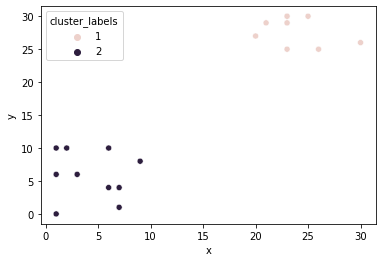

In [5]:
# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function to compute distance
Z = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

### Pokémon sightings: k-means clustering

We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Just like the previous exercise, we will use the same example of Pokémon sightings. In this exercise, you will form clusters of the sightings using k-means clustering.

x and y are columns of X and Y coordinates of the locations of sightings, stored in a pandas DataFrame, df. The following are available for use: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd.

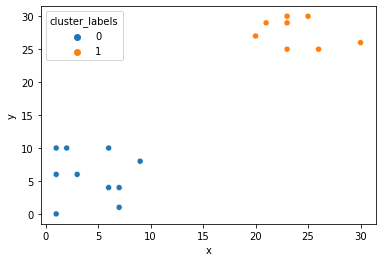

In [6]:
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# cast the df as a double to avoid an error
df = df.astype('double')

# Compute cluster centers
centroids,_ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

# Data preparation for cluster analysis

### Normalize basic list data

Now that you are aware of normalization, let us try to normalize some data. goals_for is a list of goals scored by a football team in their last ten matches. Let us standardize the data using the `whiten()` function.

[scipy.cluster.vq.whiten Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.whiten.html)

In [7]:
# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


### Visualize normalized data

After normalizing your data, you can compare the scaled data to the original data to see the difference. The variables from the last exercise, goals_for and scaled_data are already available to you.

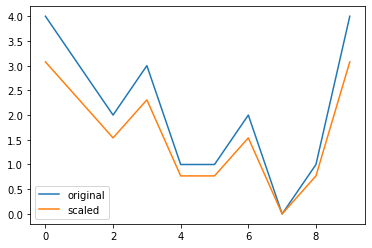

In [8]:
# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

### Normalization of small numbers

In earlier examples, you have normalization of whole numbers. In this exercise, you will look at the treatment of fractional numbers - the change of interest rates in the country of Bangalla over the years. For your use, `matplotlib.pyplot` is imported as p`lt`.

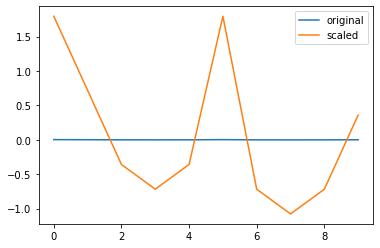

In [9]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

### IFA 18: Normalize data

FIFA 18 is a football video game that was released in 2017 for PC and consoles. The dataset that you are about to work on contains data on the 1000 top individual players in the game. You will explore various features of the data as we move ahead in the course. In this exercise, you will work with two columns, `eur_wage`, the wage of a player in Euros and `eur_value`, their current transfer market value.

The data for this exercise is stored in a pandas DataFrame, `fifa`. whiten from `scipy.cluster.vq` and `matplotlib.pyplot` as `plt` have been pre-loaded.

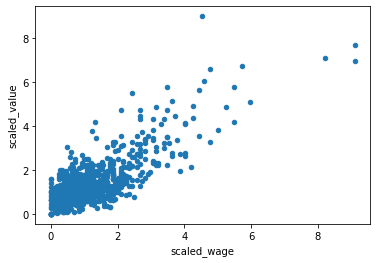

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


In [10]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind = 'scatter')
plt.show()

# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())